<ul class="breadcrumb">
  <li><a href="1.1.Univaraite_Linear_Mixed_Effects_Model.ipynb">Univariate Basics</a></li>
  <li><a href="1.2.Univariate_Linear_Additive_Genetic_Model.ipynb">Univariate Additive Genetic Model</a></li> 
  <li><a href="1.3.Univariate_Linear_Mixed_Effects_Model_with_Genomic_Data.ipynb">Univariate Genomic Data</a></li>
</ul>

<div class="span5 alert alert-success">
 <font size="5" face="Georgia">Univaraite Linear Mixed Effects Model</font> 
</div>

In [1]:
using DataFrames,JWAS,JWAS.Datasets

<button type="button" class="btn btn-lg btn-primary">Data</button> 

In [2]:
phenofile = Datasets.dataset("testMME","data.txt")
data      = readtable(phenofile,separator = ',',header=true)

,sow,site,yr,age,geneticCode,parity,nwn,SYS,bw
1,100-113,113,2005,18,PIC 1,1,8,113_2005_WNTR,9.0
2,100-113,113,2006,18,PIC 1,2,12,113_2006_SPNG,8.0
3,100-5,5,2008,15,PIC 2,1,10,5_2008_ATMN,7.5
4,1000-5,5,2009,17,PIC 2,1,10,5_2009_SPNG,8.3
5,10000-13,13,2004,16,Commercial,1,9,13_2004_WNTR,4.3
6,10000-13,13,2004,18,Commercial,2,10,13_2004_SMMR,2.8
7,10000-13,13,2004,20,Commercial,3,11,13_2004_ATMN,3.9
8,10000-13,13,2005,18,Commercial,4,11,13_2005_SPNG,10.0
9,10000-13,13,2005,25,Commercial,5,7,13_2005_ATMN,4.0
10,10000-6,6,2012,17,PIC C27,1,12,6_2012_ATMN,8.9


<button type="button" class="btn btn-lg btn-primary">Build Model</button> 

In [10]:
model_equation  = "nwn = intercept +parity + parity*site + yr + geneticCode + age"

"nwn = intercept +parity + parity*site + yr + geneticCode + age"

In [12]:
residual_variance = 2.97
model             = build_model(model_equation,residual_variance)

set_covariate(model,"age")

sow_variance      = 0.26
set_random(model,"sow",sow_variance);

<button type="button" class="btn btn-lg btn-primary">Run Model</button> 

In [13]:
outputMCMCsamples(model,"parity","age");

In [14]:
out=runMCMC(model,data,chain_length=50000,output_samples_frequency=100);

MCMC Information:
methods                        conventional (no markers)
chain_length                                  50000
estimatePi                                    false
constraint                                    false
missing_phenotypes                            false
starting_value                                false
output_samples_frequency                        100
printout_frequency                            50001

Degree of freedom for hyper-parameters:
residual variances:                           4.000
iid random effect variances:                  4.000
polygenic effect variances:                   4.000
marker effect variances:                      4.000



running MCMC for conventional (no markers)...100%|██████| Time: 0:00:01


<button type="button" class="btn btn-lg btn-primary">Check Results</button> 

In [15]:
keys(out)

Base.KeyIterator for a Dict{Any,Any} with 4 entries. Keys:
  "MCMC samples for: 1:age"
  "MCMC samples for residual variance"
  "Posterior mean of location parameters"
  "MCMC samples for: 1:parity"

In [16]:
out["Posterior mean of location parameters"]

26x2 Array{Any,2}:
 "1:intercept : intercept"       16.2405 
 "1:parity : 1"                -252.631  
 "1:parity : 2"                 128.879  
 "1:parity : 3"                 102.679  
 "1:parity : 4"                  86.6888 
 "1:parity : 5"                 164.27   
 "1:parity*site : 1 * 113"      447.974  
 "1:parity*site : 2 * 113"       90.6083 
 "1:parity*site : 1 * 5"        150.576  
 "1:parity*site : 1 * 13"       306.37   
 "1:parity*site : 2 * 13"       -63.5133 
 "1:parity*site : 3 * 13"       -25.6579 
 "1:parity*site : 4 * 13"        90.0363 
 "1:parity*site : 5 * 13"        45.7297 
 "1:parity*site : 1 * 6"        607.99   
 "1:yr : 2005"                 -297.867  
 "1:yr : 2006"                 -318.027  
 "1:yr : 2008"                  121.919  
 "1:yr : 2009"                  132.583  
 "1:yr : 2004"                 -187.51   
 "1:yr : 2012"                  370.478  
 "1:geneticCode : PIC 1"        190.16   
 "1:geneticCode : PIC 2"         53.7755 
 "1:geneticCode


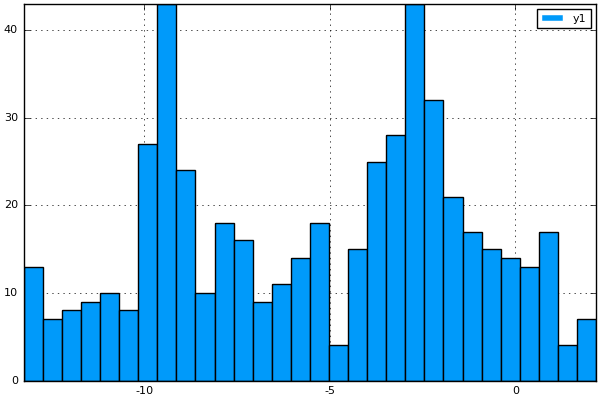

In [18]:
using Plots
sample4age = vec(out["MCMC samples for: 1:age"])
histogram(sample4age)